<a href="https://colab.research.google.com/github/radityajs28/Praktikum-ML/blob/main/Tugas%20Kelompok%20(Belum_Fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
#upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radityajs28","key":"0c406b5148e31ecd2a66266bb7dd88d8"}'}

In [3]:
#make dir
!mkdir ~/.kaggle

In [4]:
#copy
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#cek dataset
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-02 21:56:08          15170  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9215  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4094  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3389  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
#download dataset
!kaggle datasets download -d forderation/breakhis-400x

100% 803M/803M [00:06<00:00, 158MB/s]
100% 803M/803M [00:06<00:00, 127MB/s]


In [8]:
#unzip
!unzip breakhis-400x.zip

Archive:  breakhis-400x.zip
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-027.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-028.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-006.png  
  inflating: BreaKHis 400X/test/beni

In [9]:

import os
train_benign = os.listdir('/content/BreaKHis 400X/train/benign')
train_malignant = os.listdir('/content/BreaKHis 400X/train/malignant')
test_benign = os.listdir('/content/BreaKHis 400X/test/benign')
test_malignant = os.listdir('/content/BreaKHis 400X/test/malignant')

In [10]:
print('data train benign :' + str(len(train_benign)))
print('data train malignant :' + str(len(train_malignant)))
print('data test benign :' + str(len(test_benign)))
print('data test malignant :' + str(len(test_malignant)))


data train benign :371
data train malignant :777
data test benign :176
data test malignant :369


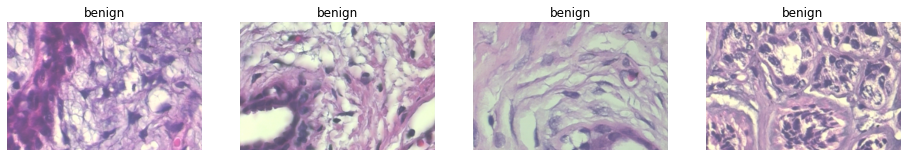

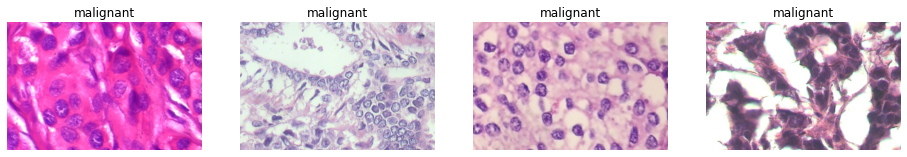

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

benign_dir = os.path.join('/content/BreaKHis 400X/train/benign')
malignant_dir = os.path.join('/content/BreaKHis 400X/train/malignant')

benign_img = os.listdir(benign_dir)
malignant_img = os.listdir(malignant_dir)

fname1 =[os.path.join(benign_dir,fname)
        for fname in benign_img[:4]]
fname2 =[os.path.join(malignant_dir,fname)
        for fname in malignant_img[:4]]

ncols = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
for i, fname in enumerate(fname1):
  sp = plt.subplot(2,4,i+1)
  sp.axis('off')
  img = mpimg.imread(fname)
  plt.title('benign')
  plt.imshow(img)
plt.show()

ncols = 4
nrows = 2
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
for i, fname in enumerate(fname2):
  sp = plt.subplot(2,4,i+1)
  sp.axis('off')
  img = mpimg.imread(fname)
  plt.title('malignant')
  plt.imshow(img)
plt.show()

In [12]:

import os
import cv2
import numpy as np

train_data = []
train_label = []

train_dir = os.path.join('/content/BreaKHis 400X/train')
for r, d, f in os.walk(train_dir):
  for file in f:
    if '.png' in file:
      img_path = os.path.join(r, file)
      img = cv2.imread(img_path)
      img = cv2.resize(img, (250,250))
      train_data.append(img)
      label = img_path.split(os.path.sep)[-2]
      train_label.append(label)
train_data = np.array(train_data)
train_label = np.array(train_label)

In [13]:
test_data = []
test_label = []

test_dir = os.path.join('/content/BreaKHis 400X/test')
for r, d, f in os.walk(test_dir):
  for file in f:
    if '.png' in file:
      img_path = os.path.join(r, file)
      img = cv2.imread(img_path)
      img = cv2.resize(img, (250,250))
      test_data.append(img)
      label = img_path.split(os.path.sep)[-2]
      test_label.append(label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [14]:
print('Train Data = ', train_data.shape)
print('Train Label = ', train_label.shape)
print('Test Data = ', test_data.shape)
print('Test Label = ', test_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Test Data =  (545, 250, 250, 3)
Test Label =  (545,)


In [15]:
print('Before ', train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print('After ', x_train[0][0][0])

Before  [181 152 178]
After  [0.70980394 0.59607846 0.69803923]


In [16]:
from sklearn.preprocessing import LabelEncoder
print('Label Before ', train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print('Label After ', y_train[995:1005])


Label Before  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']
Label After  [1 1 1 1 1 1 1 1 1 1]


In [17]:
from tensorflow.keras import layers
from tensorflow.keras import Model


In [18]:
# 3.1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               16896     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8

In [19]:
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 250, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 125, 125, 32)      0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [20]:
from tensorflow.keras.optimizers import Adam

#compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
36/36 [==============================] - 34s 84ms/step - loss: 0.6289 - acc: 0.6768 - val_loss: 0.6197 - val_acc: 0.6771
Epoch 2/100
36/36 [==============================] - 2s 60ms/step - loss: 0.5989 - acc: 0.6768 - val_loss: 0.5772 - val_acc: 0.6771
Epoch 3/100
36/36 [==============================] - 2s 58ms/step - loss: 0.5356 - acc: 0.7605 - val_loss: 0.5137 - val_acc: 0.8000
Epoch 4/100
36/36 [==============================] - 2s 58ms/step - loss: 0.4748 - acc: 0.8031 - val_loss: 0.4822 - val_acc: 0.8239
Epoch 5/100
36/36 [==============================] - 2s 61ms/step - loss: 0.4463 - acc: 0.8171 - val_loss: 0.4559 - val_acc: 0.8239
Epoch 6/100
36/36 [==============================] - 2s 59ms/step - loss: 0.4048 - acc: 0.8476 - val_loss: 0.4334 - val_acc: 0.8312
Epoch 7/100
36/36 [==============================] - 2s 60ms/step - loss: 0.3841 - acc: 0.8606 - val_loss: 0.5097 - val_acc: 0.7725
Epoch 8/100
36/36 [==============================] - 2s 59ms/step - loss: 0

In [21]:
from tensorflow.keras.optimizers import Adam

#compile model
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
H2 = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
36/36 [==============================] - 3s 68ms/step - loss: 0.6138 - acc: 0.6768 - val_loss: 0.5927 - val_acc: 0.6771
Epoch 2/100
36/36 [==============================] - 2s 63ms/step - loss: 0.5437 - acc: 0.6768 - val_loss: 0.5291 - val_acc: 0.6771
Epoch 3/100
36/36 [==============================] - 2s 55ms/step - loss: 0.4722 - acc: 0.6768 - val_loss: 0.4772 - val_acc: 0.6771
Epoch 4/100
36/36 [==============================] - 2s 55ms/step - loss: 0.4370 - acc: 0.6768 - val_loss: 0.4575 - val_acc: 0.6771
Epoch 5/100
36/36 [==============================] - 2s 53ms/step - loss: 0.4213 - acc: 0.6768 - val_loss: 0.5277 - val_acc: 0.6771
Epoch 6/100
36/36 [==============================] - 2s 55ms/step - loss: 0.4282 - acc: 0.6768 - val_loss: 0.4828 - val_acc: 0.6771
Epoch 7/100
36/36 [==============================] - 2s 54ms/step - loss: 0.4214 - acc: 0.6768 - val_loss: 0.4416 - val_acc: 0.6771
Epoch 8/100
36/36 [==============================] - 2s 55ms/step - loss: 0.

In [22]:
!pip install matplotlib

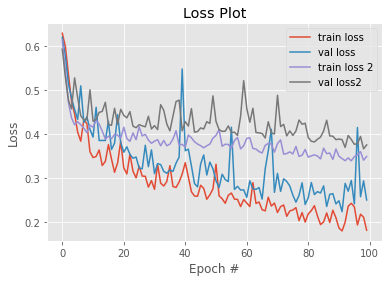

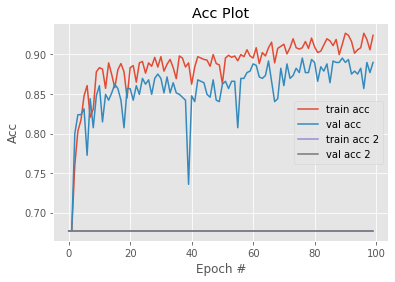

In [28]:
import matplotlib.pyplot as plt
import numpy as np

#plt.subplot(1,2,1)
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,100), H.history['loss'], label='train loss')
plt.plot(np.arange(0,100), H.history['val_loss'], label='val loss')
plt.plot(np.arange(0,100), H2.history['loss'], label='train loss 2')
plt.plot(np.arange(0,100), H2.history['val_loss'], label='val loss2')
plt.title('Loss Plot')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.show

#plt.subplot(1,2,2)
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,100), H.history['acc'], label='train acc')
plt.plot(np.arange(0,100), H.history['val_acc'], label ='val acc')
plt.plot(np.arange(0,100), H2.history['acc'], label='train acc 2')
plt.plot(np.arange(0,100), H2.history['val_acc'], label='val acc 2')
plt.title('Acc Plot')
plt.xlabel('Epoch #')
plt.ylabel('Acc')
plt.legend()

plt.show()

0 for benign,1 for malignant
[0]


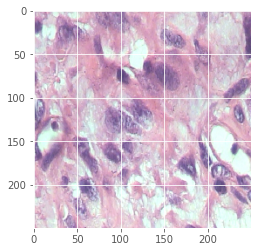

In [24]:
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image

img_ = image.load_img("/content/BreaKHis 400X/test/benign/SOB_B_PT-14-29315EF-400-005.png", target_size=(250, 250))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)

pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print("0 for benign,1 for malignant")
print(pred)

plt.imshow(img_)

0 for benign,1 for malignant
[0]


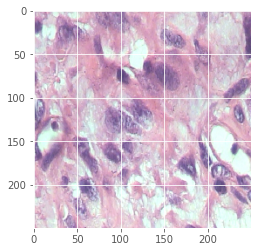

In [25]:
from keras.preprocessing.image import img_to_array

img_ = image.load_img("/content/BreaKHis 400X/test/benign/SOB_B_PT-14-29315EF-400-005.png", target_size=(250, 250))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)

pred = model2.predict(imag)
pred = np.argmax(pred,axis=1)
print("0 for benign,1 for malignant")
print(pred)

plt.imshow(img_)

In [26]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       176
           1       0.93      0.91      0.92       369

    accuracy                           0.89       545
   macro avg       0.87      0.88      0.88       545
weighted avg       0.89      0.89      0.89       545



In [27]:
from sklearn.metrics import classification_report

pred = model2.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.68      1.00      0.81       369

    accuracy                           0.68       545
   macro avg       0.34      0.50      0.40       545
weighted avg       0.46      0.68      0.55       545



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
